# Applied Statistics / HW 3 (or Project work) / Animal Crossing dataset analysis

The dataset was loaded from Kaggle: https://www.kaggle.com/datasets/jessemostipak/animal-crossing

.. the file 'villagers.csv' was chosen for further statistical analysis of all possible animals-villagers.

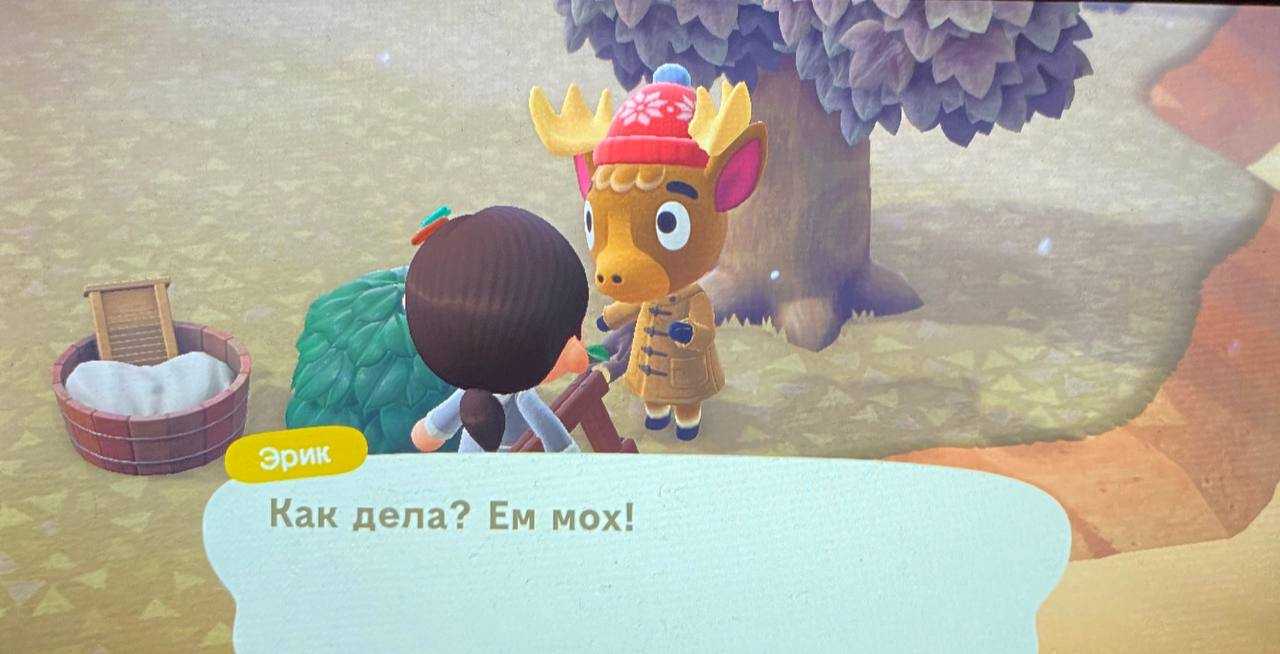

## Preparation of input data

In [1]:
import pandas as pd

df = pd.read_csv("villagers.csv")
df.head()

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...
3,6,al,Al,male,gorilla,10-18,lazy,Steep Hill,Ayyeeee,villager-al,https://villagerdb.com/images/villagers/thumb/...
4,7,alfonso,Alfonso,male,alligator,6-9,lazy,Forest Life,it'sa me,villager-alfonso,https://villagerdb.com/images/villagers/thumb/...


In [2]:
df.shape # 391 rows, 11 columns

(391, 11)

In [3]:
# drop the columns that we don't need
df = df.drop(columns=["id","row_n","phrase","full_id","url"])
df.head()

,name,gender,species,birthday,personality,song
0,Admiral,male,bird,1-27,cranky,Steep Hill
1,Agent S,female,squirrel,7-2,peppy,DJ K.K.
2,Agnes,female,pig,4-21,uchi,K.K. House
3,Al,male,gorilla,10-18,lazy,Steep Hill
4,Alfonso,male,alligator,6-9,lazy,Forest Life


## Representation of data (Visualization: Bar graphs, Pie charts, Scatter plot for categorical data)

### Species analysis

Let's find out what species the villagers are.

We can do this by querying with sql and then visualizing with plotly.

In [4]:
!pip install pandasql -q

In [5]:
from pandasql import sqldf # Structured Query Language (SQL) on DataFrames (DF)
import plotly.express as px # we're using plotly to graph

species = sqldf("SELECT species, COUNT(species) AS size FROM df GROUP BY species ORDER BY size DESC")
pie = px.pie(species, values="size", names="species", title="Villager Species", color_discrete_sequence=px.colors.qualitative.Dark24,)
pie.show()


In [6]:
barh = px.bar(species, x="size", y="species", orientation="h", color="size", title="Villager Species")
barh.update_layout(autosize=False,height=800,)
barh.show()

### Gender

Now let's go deeper and look into the diversity of the populations (we can look at gender for now).

In [7]:
gender = sqldf("SELECT gender, COUNT(gender) AS count FROM df GROUP BY gender ORDER BY count DESC")

fig = px.pie(gender, values="count", names="gender", title="Gender Distribution of Animal Crossing villagers")
fig.show()

In [8]:
species_gender = sqldf("SELECT species, gender, COUNT(gender) AS count FROM df GROUP BY species, gender ORDER BY count ASC")

bar = px.bar(species_gender, x="species", y="count", color="gender", title="Gender and Species")
bar.show()

### Personality

In [9]:
personality = sqldf("SELECT personality, COUNT(personality) AS count FROM df GROUP by personality ORDER BY count ASC")

fig = px.pie(personality, values="count", names="personality", title="Personality Types")
fig.show()

In [10]:
species_personality = sqldf("SELECT species, personality, COUNT(personality) AS count FROM df GROUP BY species, personality")

bar = px.bar(species_personality, x="count", y="species", color="personality", orientation='h', title='Personality and Species')
bar.update_layout(autosize=False,width=1000,height=1000,)
bar.show()

### Horoscope Signs

Now we want to find horoscope signs for each villager. This is a tricky to query through since we're not given an easy way to convert birthdays into horoscope signs. We need to make a function of converting birthdays into horoscope signs.

First, let's store the birthdays into a list:

In [11]:
birth_list = df["birthday"].to_list()

Now let's define a function that converts two dates into a set. This set will be representative of the interval of dates that a horoscope sign is born into:

In [12]:
import datetime

def horoscope_dates(start,end):
    horoscope_start = datetime.datetime.strptime(start, "%m-%d")
    horoscope_end = datetime.datetime.strptime(end, "%m-%d")
    horoscope_interval = [horoscope_start + datetime.timedelta(days=x) for x in range(0,(horoscope_end-horoscope_start).days)]  
    
    string_interval = []
    final_interval = []
    for date in horoscope_interval:
        string_interval.append(date.strftime("%m-%d"))
        string_interval = [i.lstrip("0") for i in string_interval]
        final_interval = [re.sub(r"(-0)", "-", i) for i in string_interval]
        
    return final_interval

Now we're going to store the intervals as horoscope sign objects (lists) using their range:

In [13]:
import re

aries = horoscope_dates("3-21", "4-20")
taurus = horoscope_dates("4-20", "5-21")
gemini = horoscope_dates("5-21", "6-22")
cancer = horoscope_dates("6-22", "7-23")
leo = horoscope_dates("7-23", "8-23")
virgo = horoscope_dates("8-23", "9-23")
libra = horoscope_dates("9-23", "10-23")
scorpio = horoscope_dates("10-23", "11-23")
sagittarius = horoscope_dates("11-23", "12-22")
capricorn = horoscope_dates("12-22", "1-20")
aquarius = horoscope_dates("1-20", "2-19")
pisces = horoscope_dates("2-19", "3-21")

We need an empty list to store the signs data before adding it to the dataframe as a column:

In [14]:
star_signs = []

for birthday in birth_list: 
    if birthday in aries: 
        star_signs.append("Aries")
    elif birthday in taurus: 
        star_signs.append("Taurus")
    elif birthday in gemini: 
        star_signs.append("Gemini")
    elif birthday in cancer: 
        star_signs.append("Cancer")
    elif birthday in leo: 
        star_signs.append("Leo")
    elif birthday in virgo: 
        star_signs.append("Virgo")
    elif birthday in libra: 
        star_signs.append("Libra")
    elif birthday in scorpio: 
        star_signs.append("Scorpio")
    elif birthday in sagittarius: 
        star_signs.append("Sagittarius")
    elif birthday in aquarius: 
        star_signs.append("Aquarius")
    elif birthday in pisces: 
        star_signs.append("Pisces")
    else: 
        # since it's at the end of the year, the function doesn't work on Capricorn 
        # we can leave it as the else statement 
        star_signs.append("Capricorn")

df["sign"] = star_signs 

In [15]:
sign = sqldf("SELECT sign, COUNT(sign) AS count FROM df GROUP BY sign")
pie = px.pie(sign, values='count', names='sign', title='Horoscope Signs')
pie.show()

In [16]:
sign_personality_species = sqldf("SELECT species, personality, sign, COUNT(sign) AS count FROM df GROUP by species, personality, sign")

fig = px.scatter(sign_personality_species, x="species", y="sign", size="count", color="personality", title="Horoscope, Personality, and Species")
fig.update_layout(autosize=False,width=1000, height=1000)
fig.show()

## Statistical analysis - Birthday problem

Dataset displays information about the 391 possible villagers that might move to an island on the game:


In [17]:
df.shape

(391, 7)

This dataset includes each villager’s birthday (that's nice):

In [18]:
df.head()

,name,gender,species,birthday,personality,song,sign
0,Admiral,male,bird,1-27,cranky,Steep Hill,Aquarius
1,Agent S,female,squirrel,7-2,peppy,DJ K.K.,Cancer
2,Agnes,female,pig,4-21,uchi,K.K. House,Taurus
3,Al,male,gorilla,10-18,lazy,Steep Hill,Libra
4,Alfonso,male,alligator,6-9,lazy,Forest Life,Gemini


Now, seeing as there are 365 possible birthdays (or 366 on a leap year), and 391 villagers, solving the Birthday Problem is incredibly easy for this dataset. There’s no possible way for some villagers not to share a birthday.

We can confirm that some villagers share birthdays by counting the number of dates that appear more than once in birthdays:

In [19]:
count = df["birthday"].value_counts()
print(count.head())
len(count[count>1])

1-27    2
12-5    2
7-31    2
3-26    2
8-3     2
Name: birthday, dtype: int64


30

There are 30 dates that appear more than once. 

We can also note that the total number of villagers sharing a birthday never exceeds two => this means that, in the dataset, there are 60 animals-villagers who share a birthday with another animal-villager.

In other words, there are 30 non-unique dates of birth, and 60 animals-villagers share a birthday
with another animal-villager, meaning that no more than two villagers share a birthday.

Now, we have a reason to suspect that the birthday date allocation is not random in Animal
Crossing.

To do further analysis, we can simulate data:

firstly, let's create a function that randomly generates a birthday date from one of the 365 days of the year for each of 391 Animal Crossing villagers:

In [20]:
import numpy as np
from itertools import groupby

days = np.linspace(start=1, stop=365, num=365)

def sample_birthdays():
  sample_dates = np.random.choice(days, size=391, replace=True, p=None)
  sample_dates = list(sample_dates)
  count_dates = {value: len(list(freq)) for value, freq in groupby(sorted(sample_dates))}
  dictionary = {key:value for key, value in count_dates.items() if value>1} 
  sum = 0
  for i in dictionary.values():
    sum += i
  return sum

# the code above randomly samples from the numbers 1-365 with replacement 391 times
# and returns the total number of duplicate data points 
# corresponding to our villagers who share a birthday with someone else.

Next, we need to run the function multiple times to generate a large number of samples (let's create 50,000 samples):

In [21]:
np.random.seed(34)

number_of_sharing_villagers = [sample_birthdays() for _ in range(50000)]

In [22]:
dff = pd.DataFrame() 
num = np.arange(50000) 
dff["sample num"] = num.tolist()
dff["num of sharing villagers"] = number_of_sharing_villagers

In [23]:
dff.head()

,sample num,num of sharing villagers
0,0,275
1,1,259
2,2,252
3,3,261
4,4,257


In [24]:
dff.shape

(50000, 2)

In [25]:
dff.describe()
# mean for 'num of sharing villager' is ~257

,sample num,num of sharing villagers
count,50000.000000,50000.000000
mean,24999.500000,256.863000
std,14433.901067,9.229237
min,0.000000,219.000000
25%,12499.750000,251.000000
50%,24999.500000,257.000000
75%,37499.250000,263.000000
max,49999.000000,293.000000


In [26]:
 mean = 257

Finally, we can plot a histogram showing the number of villagers sharing a birthday across all 50,000 samples:

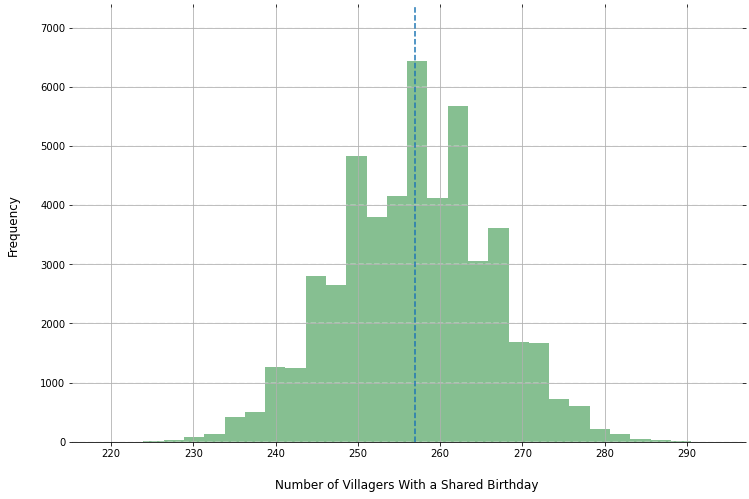

In [28]:
import matplotlib.pyplot as plt

ax = dff.hist(column="num of sharing villagers", bins=30, grid=True, figsize=(12,8), color='#86bf91')

ax = ax[0]
for x in ax:
  x.spines["right"].set_visible(False)
  x.spines["top"].set_visible(False)
  x.spines["left"].set_visible(False)

  # Switch off ticks
  x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = x.get_yticks()
  for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Remove title
  x.set_title("")

  # Set x-axis label
  x.set_xlabel("Number of Villagers With a Shared Birthday", labelpad=20, size=12)

  # Set y-axis label
  x.set_ylabel("Frequency", labelpad=20, size=12)

  plt.axvline(mean, linestyle='--')


The simulated data shows us that on average, we would expect roughly 257 villagers to share a birthday with another villager.

Conclusion: across 50,000 samples, we didn’t get a number as small as 60 even once. So, the real game date of birth allocation is very unlikely by chance.

## Statistical analysis - Rarest cat

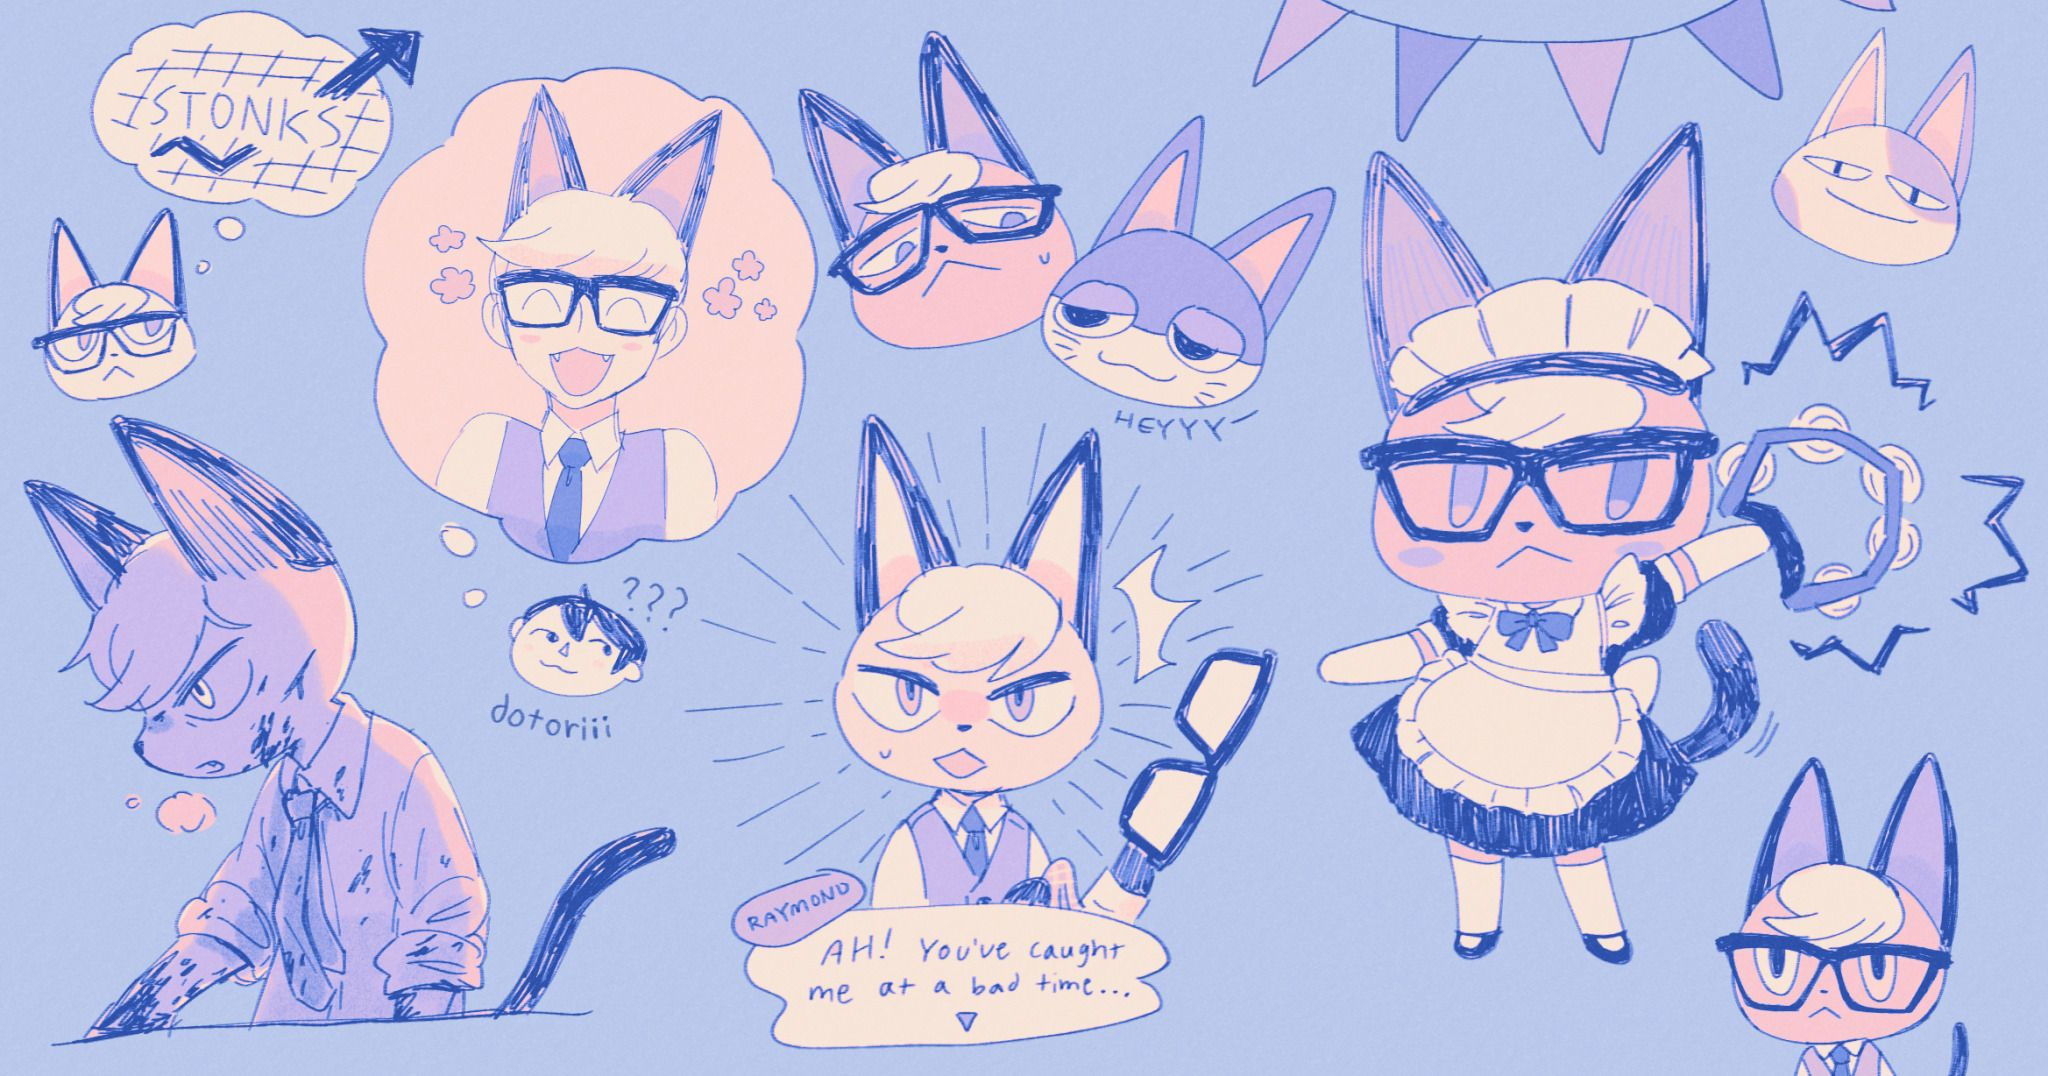

Everybody loves cats, let's look how many cats in Animal Crossing exist:

In [29]:
miu = df[df["species"]=="cat"]
miu

,name,gender,species,birthday,personality,song,sign
12,Ankha,female,cat,9-22,snooty,Marine Song 2001,Virgo
47,Bob,male,cat,1-1,lazy,K.K. Ragtime,Capricorn
134,Felicity,female,cat,3-30,peppy,K.K. Lullaby,Aries
190,Kabuki,male,cat,11-29,cranky,K.K. Folk,Sagittarius
191,Katt,female,cat,4-27,uchi,Surfin' K.K.,Taurus
196,Kid Cat,male,cat,8-1,jock,Go K.K. Rider!,Leo
198,Kiki,female,cat,10-8,normal,K.K. Country,Libra
200,Kitty,female,cat,2-15,snooty,K.K. Etude,Aquarius
211,Lolly,female,cat,3-27,normal,K.K. Stroll,Aries
233,Merry,female,cat,6-29,peppy,DJ K.K.,Cancer


In [30]:
miu.shape # 23 species

(23, 7)

We want to
determine how likely it is to find Raymond on a mystery island. 

For easier performance of analysis
we would like to assume that _the villager on a mystery island is a cat_, then to determine are the
cat-villagers equally likely or not (in other words, are cats equally likely out of all other cats). If
they are, then if the villager is a cat, the probability of obtaining Raymond would be 1/23 = 0.0435.

In [31]:
p = 1/23
p

0.043478260869565216

In [32]:
import random

cat_names = miu.name.tolist()
cat_names

['Ankha',
 'Bob',
 'Felicity',
 'Kabuki',
 'Katt',
 'Kid Cat',
 'Kiki',
 'Kitty',
 'Lolly',
 'Merry',
 'Mitzi',
 'Moe',
 'Monique',
 'Olivia',
 'Punchy',
 'Purrl',
 'Raymond',
 'Rosie',
 'Rudy',
 'Stinky',
 'Tabby',
 'Tangy',
 'Tom']

In [33]:
freqs = random.choices(cat_names,k=1000)

In [34]:
freqs.count('Raymond')

34

In [35]:
p_with_hat = 57/1000 # estimated probability
p_with_hat

0.057

In [36]:
import math 
n = 1000
z_score = (p_with_hat-p)/(math.sqrt((p*(1-p))/n))
z_score

2.096761572260683

In [37]:
import scipy.stats

# find p-value
scipy.stats.norm.sf(abs(z_score))

0.018007343447588444